<a href="https://colab.research.google.com/github/Aergia-incognito/C.S-Project/blob/main/ds_cs_N421a_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://user-images.githubusercontent.com/6457691/90080969-0f758d00-dd47-11ea-8191-fa12fd2054a7.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 4 / SPRINT 1 / NOTE 1 - assignmnet*

---





# N411. 퍼셉트론(Perceptron)과 인공신경망(Artificial Neural Networks) 과제

## 단층 퍼셉트론

이진분류 태스크를 위한 예시 데이터를 생성해보겠습니다. X 데이터는 (x좌표, y좌표)로 이루어져 있으며, 타겟 데이터는 0과 1로 이루어져 있습니다.

아래의 예시 생성 부분이 당장 이해 안가도 괜찮습니다. 넘파이를 활용해, 이런 다양한 일들을 할 수 있다는 점을 알아두시고, 궁금하신 분은 나중에 더 찾아보세요.

- np.append, np.vstack, np.hstack의 각각의 차이점에 대해 더 찾아보세요!

In [1]:
#!pip install xlrd>=1.2.0.
#!pip install -- upgrade pandas
#!pip install openpyxl
!pip install pandas xlrd --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 3.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


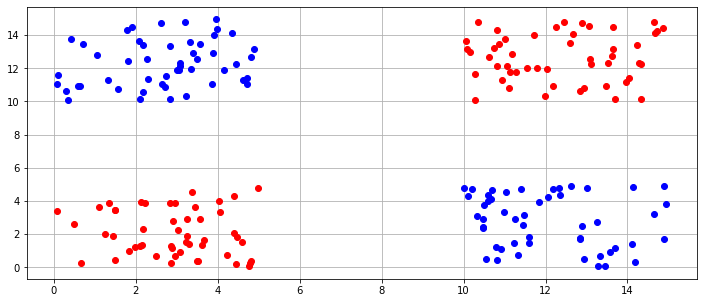

In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))


x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

### 문제 1-1

단층 퍼셉트론으로 위의 문제를 해결할 수 없음을 확인해보겠습니다. 이진 분류를 위한 단층 퍼셉트론을 구현하기 위해 다음 빈칸에 들어갈 내용으로 알맞은 것은?

Epoch 1/10
7/7 [==============================] - 1s 4ms/step - loss: 3.1952 - accuracy: 0.6300
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 2.6270 - accuracy: 0.5800
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 2.2843 - accuracy: 0.5350
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 2.0266 - accuracy: 0.5200
Epoch 5/10
7/7 [==============================] - 0s 3ms/step - loss: 1.7585 - accuracy: 0.4650
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 1.5235 - accuracy: 0.5150
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 1.2913 - accuracy: 0.4400
Epoch 8/10
7/7 [==============================] - 0s 8ms/step - loss: 1.1195 - accuracy: 0.5100
Epoch 9/10
7/7 [==============================] - 0s 6ms/step - loss: 0.9367 - accuracy: 0.5100
Epoch 10/10
7/7 [==============================] - 0s 7ms/step - loss: 0.8117 - accuracy: 0.4200


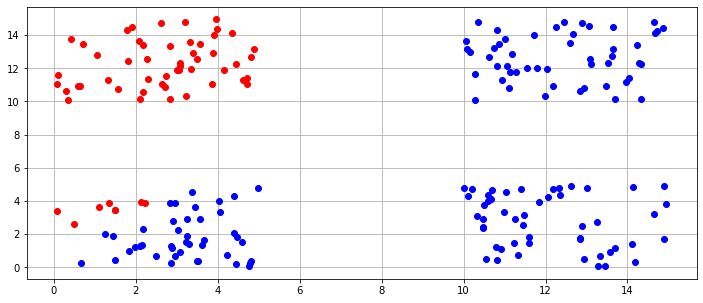

In [3]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=10)

# 각각의 변수 명을 모두 다르게 설정했습니다.
# model.predict의 결과값 / preds_1d / pred_class 의 형태(shape)와 값들을 한번 직접 확인해보세요

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

### 문제 1-2
비선형성이 추가되지 않은 단층 퍼셉트론이 어떠한 결정 경계를 만드나요?

## 문제2. 실제 데이터 과제
 - 아래 주어진 데이터를 신경망을 이용하여 Classification 문제를 풀어보세요.
 - 또한 머신러닝에서 배운 방법(배우지 않은 머신러닝 방법론(SVM 등)도 가능)을 이용하여 비교해보세요.

입력 데이터 샘플과 Features : 1077 샘플 x 69 Features (변수)

데이터 label: 다운증후군 (1), 정상군 (2)

데이터는 다운증후군과 정상군 마우스 피질의 핵 분획에서 검출 가능한 신호를 생성하는 69 개 단백질의 발현 수준으로 구성되어 있습니다.
라벨로는 다운증후군 1, 정상군 2로 할당되어 있습니다.


In [4]:
import pandas as pd
df = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_X.xls", header=None)
df_label = pd.read_excel("https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/MouseProtein/mouse_protein_label.xls", header=None)

In [5]:
# 샘플당 100개의 특성(feature)을 가진 데이터
df.head()

,0,1,2,3,4,5,6,7,8,9,...,59,60,61,62,63,64,65,66,67,68
0,0.50364,0.74719,0.43018,2.8163,5.9902,0.21883,0.17757,2.3737,0.23222,1.7509,...,0.14276,0.43096,0.24754,1.6033,2.0149,0.10823,1.04500,0.83156,0.18885,1.6757
1,0.51462,0.68906,0.41177,2.7895,5.6850,0.21164,0.17282,2.2921,0.22697,1.5964,...,0.14204,0.45716,0.25763,1.6717,2.0046,0.10975,1.00990,0.84927,0.20040,1.7436
2,0.50918,0.73025,0.41831,2.6872,5.6221,0.20901,0.17572,2.2833,0.23025,1.5613,...,0.14244,0.51047,0.25534,1.6635,2.0168,0.10820,0.99685,0.84671,0.19368,1.9264
3,0.44211,0.61708,0.35863,2.4669,4.9795,0.22289,0.17646,2.1523,0.20700,1.5951,...,0.14507,0.43100,0.25110,1.4846,1.9572,0.11988,0.99022,0.83328,0.19211,1.7006
4,0.43494,0.61743,0.35880,2.3658,4.7187,0.21311,0.17363,2.1340,0.19216,1.5042,...,0.14087,0.48123,0.25177,1.5348,2.0091,0.11952,0.99777,0.87867,0.20560,1.8397


In [6]:
#570부터 2
pd.set_option('display.max_rows',None)
#print(df_label)
print(df_label.head())
print(df_label.tail())

   0
0  1
1  1
2  1
3  1
4  1
      0
1072  2
1073  2
1074  2
1075  2
1076  2


In [7]:
#결측치 확인
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
58    0
59    0
60    0
61    0
62    0
63    0
64    0
65    0
66    0
67    0
68    0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, df_label, test_size=0.2, random_state=42)

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(1, activation = 'sigmoid')
        ])

In [10]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train-1, epochs=10)

Epoch 1/10
27/27 [==============================] - 1s 4ms/step - loss: 0.7202 - accuracy: 0.4530
Epoch 2/10
27/27 [==============================] - 0s 3ms/step - loss: 0.7040 - accuracy: 0.4762
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.5087
Epoch 4/10
27/27 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5226
Epoch 5/10
27/27 [==============================] - 0s 3ms/step - loss: 0.6918 - accuracy: 0.5180
Epoch 6/10
27/27 [==============================] - 0s 4ms/step - loss: 0.6868 - accuracy: 0.5296
Epoch 7/10
27/27 [==============================] - 0s 3ms/step - loss: 0.6812 - accuracy: 0.5401
Epoch 8/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5517
Epoch 9/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5621
Epoch 10/10
27/27 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.5679


In [12]:
#-1을 해주면 보기도 편하고 학습도 잘된다 replace()와 동일
model.evaluate(X_test, y_test-1, verbose=2)

7/7 - 0s - loss: 0.6646 - accuracy: 0.6019 - 361ms/epoch - 52ms/step


[0.6646102666854858, 0.6018518805503845]

In [13]:
df_label.value_counts(normalize=True)

1    0.529248
2    0.470752
dtype: float64

In [14]:
#y_pred

In [15]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

y_pred = model.predict(X_test)

#use_logits?(s4마지막 노트에 등장) 모델 구축시 사용(기본값이 true라 1 or 0으로 안나옴)-> np.where 사용하는 이유 
y_pred = np.where(y_pred > 0.5, 2, 1).flatten()

print("accuracy: ", accuracy_score(y_test, y_pred))
print("precision: ", precision_score(y_test, y_pred))
print("recall: ", recall_score(y_test, y_pred))
print("f1: ", f1_score(y_test, y_pred))

accuracy:  0.6018518518518519
precision:  0.6410256410256411
recall:  0.6302521008403361
f1:  0.6355932203389831


In [16]:
print(y_pred)

[1 1 2 1 1 1 2 2 1 2 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 1 1 2 1 2 1 1 2 2 1 2
 1 2 2 1 2 1 2 2 1 2 1 2 1 1 1 1 2 1 1 2 2 1 2 1 1 2 2 2 2 1 2 1 1 1 1 1 1
 1 1 2 2 2 2 2 1 1 1 2 2 1 2 2 1 2 2 1 2 2 1 2 1 2 2 1 2 2 2 2 1 1 1 2 2 1
 2 1 2 1 1 2 2 2 2 1 1 1 2 1 2 1 1 2 2 1 2 2 2 2 1 1 2 1 1 1 2 1 1 2 1 1 2
 2 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1
 2 1 1 1 2 1 1 1 2 1 2 2 2 1 2 2 2 2 1 1 1 1 1 2 1 2 1 1 2 1 2]


In [17]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = np.where(y_pred > 0.5, 2, 1).flatten()

y_true = y_test
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

           1       0.64      0.63      0.64       119
           2       0.56      0.57      0.56        97

    accuracy                           0.60       216
   macro avg       0.60      0.60      0.60       216
weighted avg       0.60      0.60      0.60       216



---

4-1. 사용한 모델을 입력합니다. 

-> sigmoid 

4-2. Accuracy를 입력합니다. 

-> 0.5509

4-3. Precision 을 입력합니다. 

-> 0.53

4-4. Recall 을 입력합니다.

-> 0.59

4-5. F1 score 를 입력합니다.
-> 0.56 

In [18]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.0 MB/s 


In [19]:
#이진분류모델로 학습
#결정나무 모델
'''
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

pipe = make_pipeline(
    OneHotEncoder(use_cat_names=True),  
    SimpleImputer(), 
    DecisionTreeClassifier(random_state=1, criterion='entropy')
)

pipe.fit(X_train, y_train)

print('테스트 결과 : ', pipe.score(X_test, y_test))
'''

"\nfrom sklearn.pipeline import make_pipeline\nfrom category_encoders import OneHotEncoder\nfrom sklearn.impute import SimpleImputer\nfrom sklearn.tree import DecisionTreeClassifier\n\npipe = make_pipeline(\n    OneHotEncoder(use_cat_names=True),  \n    SimpleImputer(), \n    DecisionTreeClassifier(random_state=1, criterion='entropy')\n)\n\npipe.fit(X_train, y_train)\n\nprint('테스트 결과 : ', pipe.score(X_test, y_test))\n"

In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred1 = tree.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred1))
print("precision: ", precision_score(y_test, y_pred1))
print("recall: ", recall_score(y_test, y_pred1))
print("f1: ", f1_score(y_test, y_pred1))

Accuracy: 0.9166666666666666
precision:  0.9316239316239316
recall:  0.9159663865546218
f1:  0.9237288135593219


In [24]:
#classification report로도 해봤는데 왜 위와 값이 다른건지???

y_pred1 = np.where(y_pred1 > 0.5, 2, 1).flatten()

y_true1 = y_test
print(classification_report(y_true1, y_pred1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       119
           2       0.45      1.00      0.62        97

    accuracy                           0.45       216
   macro avg       0.22      0.50      0.31       216
weighted avg       0.20      0.45      0.28       216



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
